<a href="https://colab.research.google.com/github/Hyun3246/Code-Warehouse/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My\ Drive/

/content/gdrive/My Drive


In [ ]:
test_df = pd.read_csv("./Colab Notebooks/test.csv")
train_df = pd.read_csv("./Colab Notebooks/train.csv")

In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_df.set_index('PassengerId', inplace=True)
test_df.set_index('PassengerId', inplace=True)

In [ ]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_index = train_df.index
test_index = test_df.index

In [ ]:
y_train_df = train_df.pop("Survived")

In [ ]:
y_train_df.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
test_df.isnull().sum() / len(test_df)

Pclass     0.00
Name       0.00
Sex        0.00
Age        0.21
SibSp      0.00
Parch      0.00
Ticket     0.00
Fare       0.00
Cabin      0.78
Embarked   0.00
dtype: float64

In [ ]:
train_df.isnull().sum() / len(train_df)

Pclass     0.00
Name       0.00
Sex        0.00
Age        0.20
SibSp      0.00
Parch      0.00
Ticket     0.00
Fare       0.00
Cabin      0.77
Embarked   0.00
dtype: float64

In [ ]:
del test_df["Cabin"]
del train_df["Cabin"]

In [ ]:
all_df = pd.concat((train_df, test_df), axis=0)

In [ ]:
all_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C
3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S
5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S
...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,S


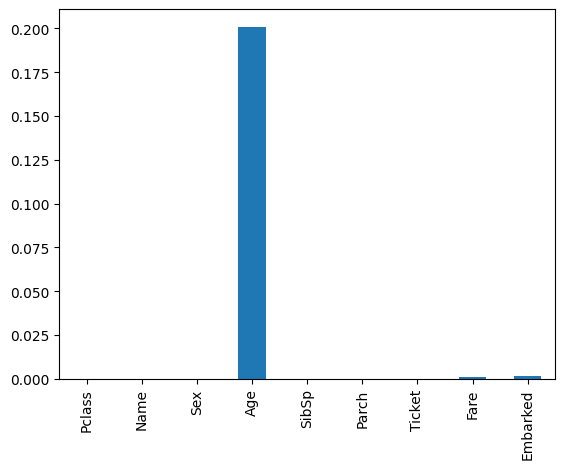

In [ ]:
(all_df.isnull().sum() / len(all_df)).plot(kind='bar')
plt.show()

In [ ]:
del all_df["Name"]

In [ ]:
del all_df["Ticket"]

In [ ]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.00,1,0,7.25,S
2,1,female,38.00,1,0,71.28,C
3,3,female,26.00,0,0,7.92,S
4,1,female,35.00,1,0,53.10,S
5,3,male,35.00,0,0,8.05,S


In [ ]:
all_df['Sex'] = all_df['Sex'].replace({"male":0, "female":1})

In [ ]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,S
2,1,1,38.00,1,0,71.28,C
3,3,1,26.00,0,0,7.92,S
4,1,1,35.00,1,0,53.10,S
5,3,0,35.00,0,0,8.05,S


In [ ]:
all_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
all_df["Embarked"] = all_df["Embarked"].replace({"S":0,"C":1,"Q":2, np.nan:99})

In [ ]:
all_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,0.00
2,1,1,38.00,1,0,71.28,1.00
3,3,1,26.00,0,0,7.92,0.00
4,1,1,35.00,1,0,53.10,0.00
5,3,0,35.00,0,0,8.05,0.00
...,...,...,...,...,...,...,...
1305,3,0,NaN,0,0,8.05,0.00
1306,1,1,39.00,0,0,108.90,1.00
1307,3,0,38.50,0,0,7.25,0.00


In [ ]:
pd.get_dummies(all_df['Embarked'], prefix='Embarked', dtype=int)

,Embarked_0.0,Embarked_1.0,Embarked_2.0,Embarked_99.0
PassengerId,,,,
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
...,...,...,...,...
1305,1,0,0,0
1306,0,1,0,0
1307,1,0,0,0


In [ ]:
matrix_df = pd.merge(
    all_df, pd.get_dummies(all_df["Embarked"], prefix="embarked", dtype=int),
    left_index=True, right_index=True)
matrix_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0.0,embarked_1.0,embarked_2.0,embarked_99.0
PassengerId,,,,,,,,,,,
1,3,0,22.00,1,0,7.25,0.00,1,0,0,0
2,1,1,38.00,1,0,71.28,1.00,0,1,0,0
3,3,1,26.00,0,0,7.92,0.00,1,0,0,0
4,1,1,35.00,1,0,53.10,0.00,1,0,0,0
5,3,0,35.00,0,0,8.05,0.00,1,0,0,0


In [ ]:
matrix_df.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0.0,embarked_1.0,embarked_2.0,embarked_99.0
Pclass,1.00,-0.12,-0.41,0.06,0.02,-0.56,-0.05,0.10,-0.27,0.23,-0.06
Sex,-0.12,1.00,-0.06,0.11,0.21,0.19,0.07,-0.12,0.07,0.09,0.05
Age,-0.41,-0.06,1.00,-0.24,-0.15,0.18,0.07,-0.08,0.09,-0.02,0.06
SibSp,0.06,0.11,-0.24,1.00,0.37,0.16,-0.03,0.08,-0.05,-0.05,-0.02
Parch,0.02,0.21,-0.15,0.37,1.00,0.22,-0.03,0.07,-0.01,-0.10,-0.02
Fare,-0.56,0.19,0.18,0.16,0.22,1.00,0.05,-0.17,0.29,-0.13,0.04
Embarked,-0.05,0.07,0.07,-0.03,-0.03,0.05,1.00,-0.21,0.06,0.12,0.99
embarked_0.0,0.10,-0.12,-0.08,0.08,0.07,-0.17,-0.21,1.00,-0.78,-0.49,-0.06
embarked_1.0,-0.27,0.07,0.09,-0.05,-0.01,0.29,0.06,-0.78,1.00,-0.16,-0.02
embarked_2.0,0.23,0.09,-0.02,-0.05,-0.10,-0.13,0.12,-0.49,-0.16,1.00,-0.01


In [ ]:
all_df.groupby('Pclass')['Age'].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [ ]:
all_df['Age'].fillna(all_df.groupby('Pclass')['Age'].transform('mean'), inplace=True)

In [ ]:
all_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,0.00
2,1,1,38.00,1,0,71.28,1.00
3,3,1,26.00,0,0,7.92,0.00
4,1,1,35.00,1,0,53.10,0.00
5,3,0,35.00,0,0,8.05,0.00
...,...,...,...,...,...,...,...
1305,3,0,24.82,0,0,8.05,0.00
1306,1,1,39.00,0,0,108.90,1.00
1307,3,0,38.50,0,0,7.25,0.00


In [ ]:
all_df['Age'].isnull().sum()

0

In [ ]:
all_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [ ]:
all_df['Fare'].fillna(all_df['Fare'].mean(), inplace=True)

In [ ]:
all_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
del all_df["Embarked"]

In [ ]:
all_df["Pclass"] = all_df["Pclass"].replace({1:"A",2:"B",3:"C"})

In [ ]:
all_df.head()

,Sex,Age,SibSp,Parch,Fare,embarked_0.0_x,embarked_1.0_x,embarked_2.0_x,embarked_99.0_x,Pclass_A,Pclass_B,Pclass_C,embarked_0.0_y,embarked_1.0_y,embarked_2.0_y,embarked_99.0_y
PassengerId,,,,,,,,,,,,,,,,
1,0,22.00,1,0,7.25,1,0,0,0,0,0,1,1,0,0,0
2,1,38.00,1,0,71.28,0,1,0,0,1,0,0,0,1,0,0
3,1,26.00,0,0,7.92,1,0,0,0,0,0,1,1,0,0,0
4,1,35.00,1,0,53.10,1,0,0,0,1,0,0,1,0,0,0
5,0,35.00,0,0,8.05,1,0,0,0,0,0,1,1,0,0,0


In [ ]:
all_df.drop(['embarked_0.0_y', 'embarked_1.0_y',	'embarked_2.0_y',	'embarked_99.0_y'], axis=1, inplace=True)

In [ ]:
all_df

,Sex,Age,SibSp,Parch,Fare,embarked_0.0_x,embarked_1.0_x,embarked_2.0_x,embarked_99.0_x,Pclass_A,Pclass_B,Pclass_C
PassengerId,,,,,,,,,,,,
1,0,22.00,1,0,7.25,1,0,0,0,0,0,1
2,1,38.00,1,0,71.28,0,1,0,0,1,0,0
3,1,26.00,0,0,7.92,1,0,0,0,0,0,1
4,1,35.00,1,0,53.10,1,0,0,0,1,0,0
5,0,35.00,0,0,8.05,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,24.82,0,0,8.05,1,0,0,0,0,0,1
1306,1,39.00,0,0,108.90,0,1,0,0,1,0,0
1307,0,38.50,0,0,7.25,1,0,0,0,0,0,1


In [ ]:
all_df.rename(columns={
    'embarked_0.0_x': 'embarked_0',
    'embarked_1.0_x': 'embarked_1',
    'embarked_2.0_x': 'embarked_2',
    'embarked_99.0_x': 'embarked_99'
}, inplace=True)

In [ ]:
all_df

,Sex,Age,SibSp,Parch,Fare,embarked_0,embarked_1,embarked_2,embarked_99,Pclass_A,Pclass_B,Pclass_C
PassengerId,,,,,,,,,,,,
1,0,22.00,1,0,7.25,1,0,0,0,0,0,1
2,1,38.00,1,0,71.28,0,1,0,0,1,0,0
3,1,26.00,0,0,7.92,1,0,0,0,0,0,1
4,1,35.00,1,0,53.10,1,0,0,0,1,0,0
5,0,35.00,0,0,8.05,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,24.82,0,0,8.05,1,0,0,0,0,0,1
1306,1,39.00,0,0,108.90,0,1,0,0,1,0,0
1307,0,38.50,0,0,7.25,1,0,0,0,0,0,1


In [ ]:
train_df = all_df[all_df.index.isin(train_index)]
test_df = all_df[all_df.index.isin(test_index)]

In [ ]:
train_df.shape

(891, 12)

In [ ]:
test_df.shape

(418, 12)

In [ ]:
test_df.head()

,Sex,Age,SibSp,Parch,Fare,embarked_0,embarked_1,embarked_2,embarked_99,Pclass_A,Pclass_B,Pclass_C
PassengerId,,,,,,,,,,,,
892,0,34.50,0,0,7.83,0,0,1,0,0,0,1
893,1,47.00,1,0,7.00,1,0,0,0,0,0,1
894,0,62.00,0,0,9.69,0,0,1,0,0,1,0
895,0,27.00,0,0,8.66,1,0,0,0,0,0,1
896,1,22.00,1,1,12.29,1,0,0,0,0,0,1


In [ ]:
x_data = train_df.values
y_data = y_train_df.values

In [ ]:
x_data.shape, y_data.shape

((891, 12), (891,))

In [ ]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(x_data,y_data)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
cls.predict(test_df.values)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
test_df.index

Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
       ...
       1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
      dtype='int64', name='PassengerId', length=418)

In [ ]:
x_test = test_df.values
y_test = cls.predict(x_test)
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
result = np.concatenate( (test_index.values.reshape(-1,1),
                 cls.predict(x_test).reshape(-1,1)  ) , axis=1)
result[:5]

array([[892,   0],
       [893,   0],
       [894,   0],
       [895,   0],
       [896,   1]])

In [ ]:
df_submssion = pd.DataFrame(result, columns=["PassengerId","Survived"])
df_submssion

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
df_submssion.to_csv("submission_result.csv",index=False)